<a href="https://colab.research.google.com/github/MaxKwen2/LSTM-Code/blob/main/TLKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=b573e6355e9db8bd43f8dcb40fdff2bccc90507f1535bab38cd2128d7df520fd
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd

df = yf.download('TLKM.JK', period="max")

# Flatten the column names
df.columns = ['_'.join(col).strip() for col in df.columns.values]

print(df.info())
print(df.describe())

# Simpan DataFrame ke file CSV di Google Drive
#drive_path = '/content/drive/MyDrive/DS' # Ganti dengan path yang Anda inginkan di Google Drive
df.to_csv('/content/drive/MyDrive/DS/dataTLKM.csv')

/tmp/ipython-input-1-784262229.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TLKM.JK', period="max")
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5117 entries, 2004-09-28 to 2025-07-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close_TLKM.JK   5117 non-null   float64
 1   High_TLKM.JK    5117 non-null   float64
 2   Low_TLKM.JK     5117 non-null   float64
 3   Open_TLKM.JK    5117 non-null   float64
 4   Volume_TLKM.JK  5117 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 239.9 KB
None
       Close_TLKM.JK  High_TLKM.JK  Low_TLKM.JK  Open_TLKM.JK  Volume_TLKM.JK
count    5117.000000   5117.000000  5117.000000   5117.000000    5.117000e+03
mean     2163.071458   2187.623288  2138.900413   2163.504349    1.018375e+08
std      1139.488855   1149.900629  1129.245076   1139.969830    6.643011e+07
min       485.378265    485.378265   476.553206    483.148700    0.000000e+00
25%      1043.639160   1058.936790  1031.025332   1043.639160    6.172500e+07
50%      2137.361328   2154.830095  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0268 - val_loss: 0.0011
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 8.8829e-04
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 9.0276e-04
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 9.7316e-04
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 9.9474e-04
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 7.4853e-04
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010 - val_loss: 7.3846e-04
Epoch 11/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 12/25
126/126 ━━━━━

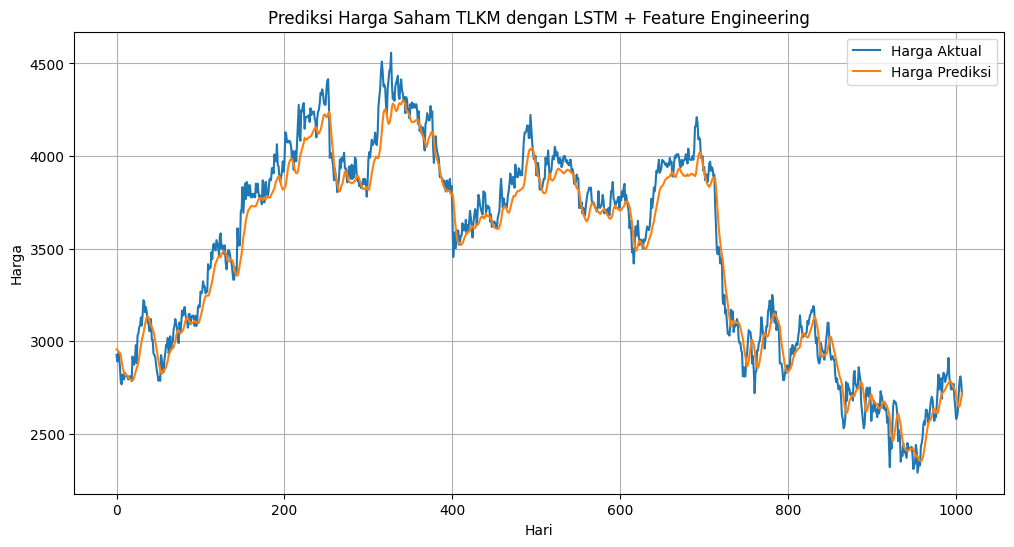

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


df = pd.read_csv("/content/drive/MyDrive/DS/dataTLKM.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# STEP 3: Feature Engineering
df['return_1d'] = df['Close_TLKM.JK'].pct_change()
df['ma_5'] = df['Close_TLKM.JK'].rolling(window=5).mean()
df['ma_10'] = df['Close_TLKM.JK'].rolling(window=10).mean()
df['ma_20'] = df['Close_TLKM.JK'].rolling(window=20).mean()
df['range'] = df['High_TLKM.JK'] - df['Low_TLKM.JK']
df['volume_z'] = (df['Volume_TLKM.JK'] - df['Volume_TLKM.JK'].rolling(20).mean()) / df['Volume_TLKM.JK'].rolling(20).std()

# Hapus nilai NaN hasil rolling
df.dropna(inplace=True)

# Pilih fitur dan target
features = ['Close_TLKM.JK', 'ma_10', 'volume_z']
target = 'Close_TLKM.JK'
data = df[features]

# Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# STEP 4: Membentuk window time series
def create_multivariate_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  # kolom 0 = harga penutupan
    return np.array(X), np.array(y)

window_size = 60
X, y = create_multivariate_sequences(scaled_data, window_size)

# STEP 5: Split data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# STEP 6: Model LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# STEP 7: Prediksi
predicted = model.predict(X_test)
# Gunakan kembali hanya skala harga penutupan
scaler_price = MinMaxScaler()
scaler_price.fit(df[['Close_TLKM.JK']])
predicted_prices = scaler_price.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler_price.inverse_transform(y_test.reshape(-1, 1))

# STEP 8: Visualisasi
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Harga Aktual')
plt.plot(predicted_prices, label='Harga Prediksi')
plt.title('Prediksi Harga Saham TLKM dengan LSTM + Feature Engineering')
plt.xlabel('Hari')
plt.ylabel('Harga')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# RMSE
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f"RMSE: {rmse:.2f}")

# MAPE
mape = mean_absolute_percentage_error(real_prices, predicted_prices) * 100
print(f"MAPE: {mape:.2f}%")

RMSE: 101.76
MAPE: 2.31%


Training: units=64, dropout=0.2, optimizer=adam, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 8088.1262
Training: units=64, dropout=0.2, optimizer=adam, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 16911.7287
Training: units=64, dropout=0.2, optimizer=rmsprop, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE: 6342.2366
Training: units=64, dropout=0.2, optimizer=rmsprop, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
MSE: 27842.0285
Training: units=64, dropout=0.3, optimizer=adam, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 12123.5537
Training: units=64, dropout=0.3, optimizer=adam, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 11354.8551
Training: units=64, dropout=0.3, optimizer=rmsprop, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 6480.5659
Training: units=64, dropout=0.3, optimizer=rmsprop, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 37139.3911
Training: units=128, dropout=0.2, optimizer=adam, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 10261.7119
Training: units=128, dropout=0.2, optimizer=adam, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE: 10393.0204
Training: units=128, dropout=0.2, optimizer=rmsprop, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE: 5987.9997
Training: units=128, dropout=0.2, optimizer=rmsprop, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 14095.2289
Training: units=128, dropout=0.3, optimizer=adam, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 6130.5039
Training: units=128, dropout=0.3, optimizer=adam, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 12518.1708
Training: units=128, dropout=0.3, optimizer=rmsprop, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 6528.3982
Training: units=128, dropout=0.3, optimizer=rmsprop, layers=2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


MSE: 8741.9656
Units=128, Dropout=0.2, Optimizer=rmsprop, Layers=1, MSE=5987.9997
Units=128, Dropout=0.3, Optimizer=adam, Layers=1, MSE=6130.5039
Units=64, Dropout=0.2, Optimizer=rmsprop, Layers=1, MSE=6342.2366
Units=64, Dropout=0.3, Optimizer=rmsprop, Layers=1, MSE=6480.5659
Units=128, Dropout=0.3, Optimizer=rmsprop, Layers=1, MSE=6528.3982
Units=64, Dropout=0.2, Optimizer=adam, Layers=1, MSE=8088.1262
Units=128, Dropout=0.3, Optimizer=rmsprop, Layers=2, MSE=8741.9656
Units=128, Dropout=0.2, Optimizer=adam, Layers=1, MSE=10261.7119
Units=128, Dropout=0.2, Optimizer=adam, Layers=2, MSE=10393.0204
Units=64, Dropout=0.3, Optimizer=adam, Layers=2, MSE=11354.8551
Units=64, Dropout=0.3, Optimizer=adam, Layers=1, MSE=12123.5537
Units=128, Dropout=0.3, Optimizer=adam, Layers=2, MSE=12518.1708
Units=128, Dropout=0.2, Optimizer=rmsprop, Layers=2, MSE=14095.2289
Units=64, Dropout=0.2, Optimizer=adam, Layers=2, MSE=16911.7287
Units=64, Dropout=0.2, Optimizer=rmsprop, Layers=2, MSE=27842.0285
Uni

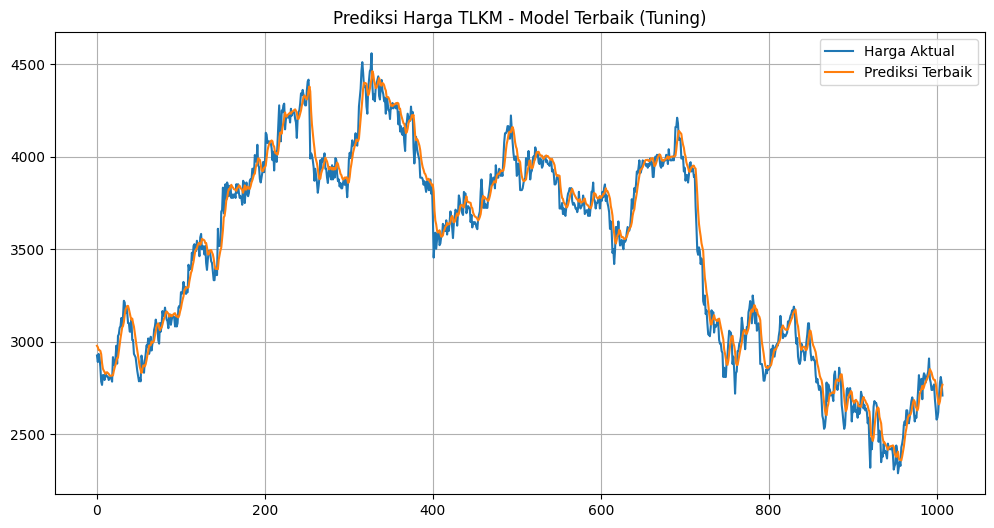

In [ ]:
# Lanjutan dari kode sebelumnya, setelah preprocessing & sequence siap
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import itertools

# Definisi grid parameter
neurons = [64, 128]
dropouts = [0.2, 0.3]
optimizers = ['adam', 'rmsprop']
layer_options = [1, 2]

results = []
best_model = None
best_mse = float('inf')

# Loop semua kombinasi parameter
for units, drop, opt, layers in itertools.product(neurons, dropouts, optimizers, layer_options):
    print(f"Training: units={units}, dropout={drop}, optimizer={opt}, layers={layers}")

    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(LSTM(units, return_sequences=(layers==2), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(drop))
    if layers == 2:
        model.add(LSTM(units))
        model.add(Dropout(drop))
    model.add(Dense(1))
    model.compile(optimizer=opt, loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    preds = model.predict(X_test)
    preds_rescaled = scaler_price.inverse_transform(preds.reshape(-1, 1))
    y_true_rescaled = scaler_price.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_true_rescaled, preds_rescaled)

    print(f"MSE: {mse:.4f}")
    results.append((units, drop, opt, layers, mse))

    if mse < best_mse:
        best_mse = mse
        best_model = model

# Tampilkan hasil tuning
sorted_results = sorted(results, key=lambda x: x[-1])
for res in sorted_results:
    print(f"Units={res[0]}, Dropout={res[1]}, Optimizer={res[2]}, Layers={res[3]}, MSE={res[4]:.4f}")

# Simpan model terbaik (opsional)
best_model.save("best_lstm_TLKM.h5")

# Visualisasi hasil terbaik
best_pred = best_model.predict(X_test)
best_pred_rescaled = scaler_price.inverse_transform(best_pred.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(y_true_rescaled, label="Harga Aktual")
plt.plot(best_pred_rescaled, label="Prediksi Terbaik")
plt.title("Prediksi Harga TLKM - Model Terbaik (Tuning)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# RMSE
rmse = np.sqrt(mean_squared_error(real_prices, best_pred_rescaled))
print(f"RMSE: {rmse:.2f}")

# MAPE
mape = mean_absolute_percentage_error(real_prices, best_pred_rescaled) * 100
print(f"MAPE: {mape:.2f}%")

RMSE: 77.38
MAPE: 1.78%


In [ ]:
import joblib

joblib.dump(best_model, '/content/drive/MyDrive/DS/modelTLKM.pkl')

['/content/drive/MyDrive/DS/modelTLKM.pkl']

In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/DS/modelTLKM.pkl')
def predict_n_days(model, data, scaler, n_days=60, window_size=60):
    predictions = []
    last_window = data[-window_size:]  # Ambil window terakhir

    for _ in range(n_days):
        input_seq = last_window.reshape(1, window_size, data.shape[1])
        pred_scaled = model.predict(input_seq, verbose=0)[0][0]

        # Buat baris baru dengan prediksi dan fitur lainnya
        next_row = last_window[-1].copy()
        next_row[0] = pred_scaled  # ganti nilai Close dengan prediksi

        # Geser window dan tambahkan next_row
        last_window = np.vstack([last_window[1:], next_row])
        predictions.append(pred_scaled)

    # Balik ke harga asli
    predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predicted_prices

# Prediksi 1 tahun ke depan (sekitar 60 hari bursa)
future_preds_1yr = predict_n_days(model, scaled_data, scaler_price, n_days=60)

# Buat tanggal masa depan
last_date = df['Date'].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=60, freq='B')  # 'B' = business day

# Buat DataFrame hasil prediksi
future_df_1yr = pd.DataFrame({'Tanggal': future_dates, 'Prediksi Harga': future_preds_1yr.flatten()})

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(future_df_1yr['Tanggal'], future_df_1yr['Prediksi Harga'], label='Prediksi 1 Tahun')
plt.title("Prediksi Harga Penutupan Saham UNVR (1 Tahun ke Depan)")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid()
plt.legend()
plt.show()

future_df_1yr.to_csv("/content/drive/MyDrive/DS/prediksi_2_bulan_UNVR.csv", index=False)